# Phishing Email Detection

## Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Apaulgithub/oibsip_taskno4/main/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 5572
Columns: 5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
duplicates = df.duplicated().sum()
print(f'Duplicate Rows: {duplicates}')

Duplicate Rows: 403


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## Understanding the variables

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.describe(include='all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
for i in df.columns.tolist():
    print(f'Unique values in {i}: {df[i].nunique()}')

Unique values in v1: 2
Unique values in v2: 5169
Unique values in Unnamed: 2: 43
Unique values in Unnamed: 3: 10
Unique values in Unnamed: 4: 5


## Data Wrangling

In [11]:
df.rename(columns={
    'v1': 'Category',
    'v2': 'Message'
}, inplace=True) # Change v1, v2 columns as category and Message. 
df.drop(columns={'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace=True) # Remove all unnamed columns
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Data Visualization

Text(0.5, 1.0, 'Spam vs Ham')

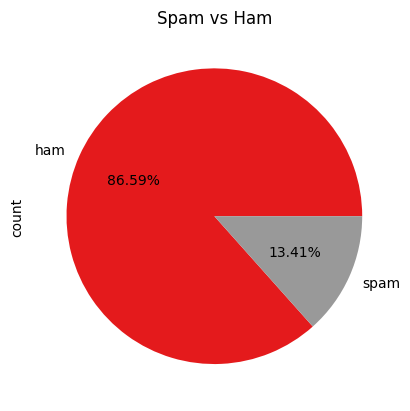

In [13]:
spread = df['Category'].value_counts()
spread.plot(kind='pie', autopct='%1.2f%%', cmap='Set1')
plt.title('Spam vs Ham')

In [14]:
df_spam = df[df['Category']=='spam'].copy()

In [15]:
comment_words=''
stopwords = set(STOPWORDS)
for val in df_spam.Message:
    val = str(val)
    tokens = val.split()
    for idx, val in enumerate(tokens):
        val = val.lower()
    comment_words += ' '.join(tokens)+' ' 

(-0.5, 399.5, 199.5, -0.5)

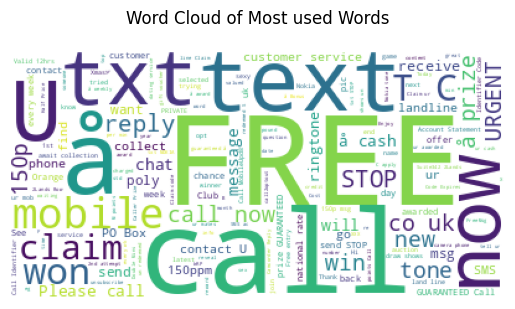

In [24]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(comment_words)
plt.title('Word Cloud of Most used Words', pad=20)
plt.imshow(wordcloud)
plt.axis('off')